## Homework - Instructions

![](https://github.com/rpi-techfundamentals/hm-01-starter/blob/master/notsaved.png?raw=1)

**WARNING!!!  If you see this icon on the top of your COLAB sesssion, your work is not saved automatically.**


**When you are working on homeworks, make sure that you save often. You may find it easier to save intermident copies in Google drive. If you save your working file in Google drive all changes will be saved as you work. MAKE SURE that your final version is saved to GitHub.** 

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All).  You can speak with others regarding the assignment but all work must be your own. 


### This is a 30 point assignment graded from answers to questions and automated tests that should be run at the bottom. Be sure to clearly label all of your answers and commit final tests at the end.  

In [0]:
files = "https://github.com/rpi-techfundamentals/hm-pca-cluster-starter/raw/master/starter.zip" 
!rm -rf * && pip install git+https://github.com/data-8/Gofer-Grader && wget $files && unzip -o starter.zip

  Cloning https://github.com/data-8/Gofer-Grader to /tmp/pip-req-build-lc2b97x8
  Running command git clone -q https://github.com/data-8/Gofer-Grader /tmp/pip-req-build-lc2b97x8
  Created wheel for gofer-grader: filename=gofer_grader-1.0.9-cp36-none-any.whl size=10115 sha256=fa38ee1736b4f1c92863e05477549bea9136cb3000c2982bc4096c34226bc653
  Stored in directory: /tmp/pip-ephem-wheel-cache-t6l_xhdu/wheels/9e/62/24/8563ae039051d6ba979557d1766bfebbda5dd08f8572e3e35d
Successfully built gofer-grader
--2019-11-02 02:19:36--  https://github.com/rpi-techfundamentals/hm-pca-cluster-starter/raw/master/starter.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rpi-techfundamentals/hm-pca-cluster-starter/master/starter.zip [following]
--2019-11-02 02:19:37--  https://raw.githubusercontent.com/rpi-techfundamentals/hm-pca-cluster-st

In [0]:
#Run this. It initiates autograding. 
from client.api.notebook import Notebook
ok = Notebook('lab.ok')
_ = ok.auth(inline=True)

### Load Data
Here we have 2 files. One we will use for PCA and the other for cluster analysis. 


In [0]:
# Load the data here
import pandas as pd
df_cluster  = pd.read_csv("cluster.csv")
df_pca  = pd.read_csv("pca.csv")

## EDA

Do some simple exploritory analysis on the data so that you understand the structure of the data. 

In [0]:
# Understand the data shape of each data frame
print('Shape of the data', '\ndf_cluster',df_cluster.shape, '\ndf_pca', df_pca.shape)

# Get a brief understanding of these two dataframes, what is inside
print('\nLook at head of data', '\ndf_cluster\n',df_cluster.head(), '\ndf_pca\n', df_pca.head())
print('\nLook at statistic features of data', '\ndf_cluster\n',df_cluster.describe(), '\ndf_pca\n', df_pca.describe())

Shape of the data 
df_cluster (10000, 21) 
df_pca (10000, 151)

Look at head of data 
df_cluster
    cad0  cad1  cad2  cad3  cad4  cad5  cad6  ...  dv4  dv5  dv6  dv7  dv8  dv9    y
0     1     1     0     0     1     0     1  ...    1    0    1    0    0    1  454
1     1     1     0     1     1     0     0  ...    1    0    1    0    0    1  454
2     1     1     0     0     1     0     0  ...    1    1    1    0    1    0  152
3     1     1     0     1     1     0     1  ...    1    0    1    0    1    1 -142
4     1     1     0     0     1     0     0  ...    0    1    1    1    0    0 -227

[5 rows x 21 columns] 
df_pca
    col0  col1  col2  col3  col4  col5  ...  gen25  gen26  gen27  gen28  gen29   y
0     1     1     1     1     1     1  ...      1      1      1      1      1  17
1     2     4     4     4     4     4  ...      1      1      1      1      1  23
2     1     1     1     1     1     1  ...      4      2      3      1      4  11
3     4     4     4     4     4     4 

### PCA Data Baseline Regression.
On the PCA data, perform a 50/50 train test split with `random state` equal to 99. Predict `y` with all variables using regression analysis. Calculate the r2 for train and assign to `pca1_r2_train` and calculate the r2 for test and assign to `pca1_r2_test`. 


In [0]:
# Perform a 50/50 train test split with random state equal to 99 on the PCA data

# import modules
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_pca = df_pca.iloc[:, 0:150]
y = df_pca['y']

train_X_pca, test_X_pca, train_y_pca, test_y_pca = train_test_split(X_pca, y, train_size=0.5, test_size=0.5, random_state=99)

# Predict using Linear Regression on train data

lin_reg = LinearRegression()
lin_reg.fit(train_X_pca, train_y_pca)
y_pred_train_pca = lin_reg.predict(train_X_pca)

# Calculate R2 for train
pca1_r2_train = r2_score(train_y_pca, y_pred_train_pca)
print('pca1_r2_train', pca1_r2_train)

# predict y for test
y_pred_test_pca = lin_reg.predict(test_X_pca)

# Calculate R2 for test
pca1_r2_test = r2_score(test_y_pca, y_pred_test_pca)
print('pca1_r2_test', pca1_r2_test)

pca1_r2_train 0.997313308708175
pca1_r2_test 0.9972599623679496


### PCA Analysis

So you should find that the overall r2 is quite high, but we have a really complex model with 150 predictors. Run PCA with 4, 5, and 6 components. For example, running with 4 components means setting `n_components=4`. 

* Check out the variance explained from each of the numbers of principal components. When you find taht increasing the number of components only increases the variance explained by a small amount.  * 





In [0]:
def Calculate_Explain_Variance_PCA_Components(n):
  from sklearn.decomposition import PCA
  import numpy as np
  
  pca = PCA(n_components=n)
  X_temp = pca.fit_transform(X_pca)
  
  print(pca.explained_variance_)
  
  return pca.explained_variance_

explained_variance_pc4 = Calculate_Explain_Variance_PCA_Components(4)
explained_variance_pc5 = Calculate_Explain_Variance_PCA_Components(5)
explained_variance_pc6 = Calculate_Explain_Variance_PCA_Components(6)

[37.64654989 36.98362608 36.84994216 36.06009247]
[37.64654989 36.98362608 36.84994216 36.06009247 35.46054229]
[37.64654989 36.98362608 36.84994216 36.06009247 35.46054229  0.64201505]


183.64276795688664


Text(0, 0.5, 'cumulative explained variance')

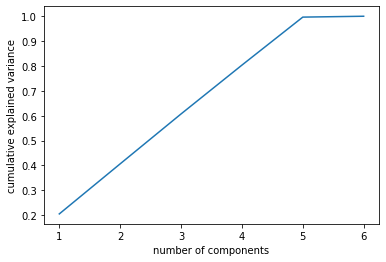

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sum_all_variance = sum(explained_variance_pc6)
print(sum_all_variance)

x = [1,2,3,4,5,6]
plt.plot(x, np.cumsum(explained_variance_pc6)/sum_all_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

After experimenting with 4, 5, and 6 components, explain why 5 is the correct number of components.

In [0]:
man1="""

I draw a plot above for the cumulative variances ratio by 6 principle components. As for how many components we should choose for PCA, it is a the trade off 
between the number of features and explained variance.
Based on this plot, we can see variance of component 6 drop quickly to near 0.6, which is far more lower than the variances of the former PCs. And the cumulative 
variance ratio increase much slower than former. Therefore, 5 PCs will be best for this problem.
On the other hand, we should always check the accuracy of our prediction with the included PCs. Explained variance doesn't always guarantee a good prediction 
performance which is our ultimate goal. So to answer how much is good enough is also decided by the performance of the predictive modeling.

"""

Using just the 5 PCA components as X, perform a 50/50 train test split with `random state` equal to 99. Predict `y` with all variables using regression analysis. Calculate the r2 for train and assign to `pca2_r2_train` and calculate the r2 for test and assign to `pca2_r2_test`. 

In [0]:
# import modules
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Use just the 5 PCA components as X
pca = PCA(n_components=5)
X_pca2 = pca.fit_transform(X_pca)
y = df_pca['y']

# Perform a 50/50 train test split with random state equal to 99
train_X_pca2, test_X_pca2, train_y_pca2, test_y_pca2 = train_test_split(X_pca2, y, train_size=0.5, test_size=0.5, random_state=99)

# Predict using Linear Regression on train data
lin_reg = LinearRegression()
lin_reg.fit(train_X_pca2, train_y_pca2)
y_pred_train_pca2 = lin_reg.predict(train_X_pca2)

# Calculate R2 for train
pca2_r2_train = r2_score(train_y_pca2, y_pred_train_pca2)
print('pca2_r2_train', pca2_r2_train)

# predict y for test
y_pred_test_pca2 = lin_reg.predict(test_X_pca2)

# Calculate R2 for test
pca2_r2_test = r2_score(test_y_pca2, y_pred_test_pca2)
print('pca2_r2_test', pca2_r2_test)



pca2_r2_train 0.7048836826606626
pca2_r2_test 0.7006963138515008


## Challenge Problem: Feature Selection.  
While we obtained a decent R2 with PCA, it wasn't as good as had with the origional data.  Rather than dimensionality reduction using principal components, try to use feature selection to get 4 components that explain >99% of the variance. 

List those features here. 

In [0]:
# import modules
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train A Random Forest Classifier
forest = RandomForestRegressor(random_state=99)
forest.fit(train_X_pca, train_y_pca) 
importances = forest.feature_importances_

# create feature selection model
model = SelectFromModel(forest, prefit=True, max_features=4)

feature_idx = model.get_support()
feature_names = X_pca.columns[feature_idx]
#print('\nSelected features: ', type(feature_names))

selected_features = list(feature_names)
print(selected_features)

X_FS = model.transform(X_pca)
y_FS = df_pca['y']

# Perform a 50/50 train test split with random state equal to 99
train_X_FS, test_X_FS, train_y_FS, test_y_FS = train_test_split(X_FS, y_FS, train_size=0.5, test_size=0.5, random_state=99)

# Predict using Linear Regression on train data
lin_reg = LinearRegression()
lin_reg.fit(train_X_FS, train_y_FS)
y_pred_train_FS = lin_reg.predict(train_X_FS)

# Calculate R2 for train
FeatureSelection_r2_train = r2_score(train_y_FS, y_pred_train_FS)
print('FeatureSelection_r2_train', FeatureSelection_r2_train)

# predict y for test
y_pred_test_FS = lin_reg.predict(test_X_FS)

# Calculate R2 for test
FeatureSelection_r2_test = r2_score(test_y_FS, y_pred_test_FS)
print('FeatureSelection_r2_test', FeatureSelection_r2_test)



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['col10', 'cog17', 'fak27', 'gen27']
FeatureSelection_r2_train 0.9972479617259539
FeatureSelection_r2_test 0.9973120323516369


### Cluster Data Baseline Regression
 On the Cluster data, perform a 50/50 train test split with `random state` equal to 99. Predict `y` with all variables using regression analysis. Calculate the r2 for train and assign to `cluster1_r2_train` and calculate the r2 for test and assign to `cluster1_r2_test`. 

In [0]:
# import modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# On the Cluster data, perform a 50/50 train test split with random state equal to 99
X_cluster = df_cluster.iloc[:, 0:20]
y = df_cluster['y']

train_X_cluster, test_X_cluster, train_y_cluster, test_y_cluster = train_test_split(X_cluster, y, train_size=0.5, test_size=0.5, random_state=99)

# Predict using Linear Regression on train data
lin_reg = LinearRegression()
lin_reg.fit(train_X_cluster, train_y_cluster)
y_pred_train_cluster = lin_reg.predict(train_X_cluster)

# Calculate R2 for train
cluster1_r2_train = r2_score(train_y_cluster, y_pred_train_cluster)
print('cluster1_r2_train', cluster1_r2_train)

# predict y for test
y_pred_test_cluster = lin_reg.predict(test_X_cluster)

# Calculate R2 for test
cluster1_r2_test = r2_score(test_y_cluster, y_pred_test_cluster)
print('cluster1_r2_test', cluster1_r2_test)



cluster1_r2_train 0.45623553847213816
cluster1_r2_test 0.47293356734863634


### KMeans Cluster Analysis

Next perform a cluster analysis using ONLY variables that start with `cad0`-`cad9` and specify 6 clusters.  Set random_state to `99` for KMEANS algorithm. Add the variable `df_cluster['cluster']` to the origional dataframe to indicate the cluster membership. 


In [0]:
# import modules
from sklearn.cluster import KMeans

# perform a cluster analysis using ONLY variables that start with cad0-cad9
X_cluster_kmeans = df_cluster.iloc[:, 0:10]
#X_cluster_kmeans.columns

# specify 6 clusters and Set random_state to 99
kmeans = KMeans(n_clusters=6, random_state=99)
kmeans.fit(X_cluster_kmeans)

# Add the variable df_cluster['cluster'] to the origional dataframe to indicate the cluster membership.
df_cluster['cluster'] = kmeans.predict(X_cluster_kmeans)
#df_cluster['cluster']

### Clusters Continued

Then select only rows from df_cluster which you have assigned to cluster 1.  For only cluster 1 predict `y` with all variables using regression analysis. Calculate the r2 for train and assign to `cluster2_r2_train` and calculate the r2 for test and assign to `cluster2_r2_test`. Like before set random_state to `99` for the train test split. 

In [0]:
# import modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# select only rows from df_cluster which you have assigned to cluster 1
df_cluster_1 = df_cluster[df_cluster.cluster == 1]
X_cluster_1 = df_cluster_1.iloc[:,0:20]
y_cluster_1 = df_cluster_1['y']

train_X_cluster2, test_X_cluster2, train_y_cluster2, test_y_cluster2 = train_test_split(X_cluster_1, y_cluster_1, train_size=0.5, test_size=0.5, random_state=99)

# Predict using Linear Regression on train data
lin_reg = LinearRegression()
lin_reg.fit(train_X_cluster2, train_y_cluster2)

# Calculate R2 for train
cluster2_r2_train = lin_reg.score(train_X_cluster2, train_y_cluster2)
print('cluster2_r2_train', cluster2_r2_train)

# Calculate R2 for test
cluster2_r2_test = lin_reg.score(test_X_cluster2, test_y_cluster2)
print('cluster2_r2_test', cluster2_r2_test)

cluster2_r2_train 0.6459709875932009
cluster2_r2_test 0.6534232293097941


In [0]:
import os
files = "https://www.dropbox.com/s/nnkxhjso04f5as7/pca.zip"
!rm -rf * && pip install git+https://github.com/data-8/Gofer-Grader && wget $files && unzip -o pca.zip
from client.api.notebook import Notebook
ok = Notebook('lab.ok')
_ = ok.auth(inline=True)
results= {q[:-3]:ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')}

  Cloning https://github.com/data-8/Gofer-Grader to /tmp/pip-req-build-t1adj8a0
  Running command git clone -q https://github.com/data-8/Gofer-Grader /tmp/pip-req-build-t1adj8a0
  Created wheel for gofer-grader: filename=gofer_grader-1.0.9-cp36-none-any.whl size=10115 sha256=ea28458c6b8ea7430c2fc087d40d0acaad8d885614482bc6733445e1ae85e536
  Stored in directory: /tmp/pip-ephem-wheel-cache-lu6rj9gl/wheels/9e/62/24/8563ae039051d6ba979557d1766bfebbda5dd08f8572e3e35d
Successfully built gofer-grader
--2019-11-02 02:19:47--  https://www.dropbox.com/s/nnkxhjso04f5as7/pca.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nnkxhjso04f5as7/pca.zip [following]
--2019-11-02 02:19:47--  https://www.dropbox.com/s/raw/nnkxhjso04f5as7/pca.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request se